In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2020-10-01 13:05:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2020-10-01 13:05:49 (81.5 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [ ]:
tokenizer = Tokenizer()
data=open('/tmp/irish-lyrics-eof.txt').read()
corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1
print(total_words)

2690


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
377/377 [==============================] - 7s 19ms/step - loss: 6.6387 - accuracy: 0.0725
Epoch 2/500
377/377 [==============================] - 7s 19ms/step - loss: 5.7577 - accuracy: 0.1134
Epoch 3/500
377/377 [==============================] - 7s 19ms/step - loss: 4.8654 - accuracy: 0.1649
Epoch 4/500
377/377 [==============================] - 7s 19ms/step - loss: 3.9367 - accuracy: 0.2361
Epoch 5/500
377/377 [==============================] - 7s 19ms/step - loss: 3.0862 - accuracy: 0.3437
Epoch 6/500
377/377 [==============================] - 7s 19ms/step - loss: 2.3747 - accuracy: 0.4588
Epoch 7/500
377/377 [==============================] - 7s 19ms/step - loss: 1.8805 - accuracy: 0.5570
Epoch 8/500
377/377 [==============================] - 7s 19ms/step - loss: 1.4980 - accuracy: 0.6394
Epoch 9/500
377/377 [==============================] - 7s 19ms/step - loss: 1.2798 - accuracy: 0.6891
Epoch 10/500
377/377 [==============================] - 7s 19ms/step - loss: 1.117

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

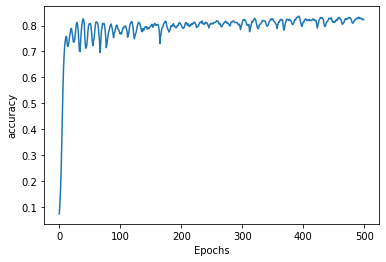

In [ ]:
plot_graphs(history, 'accuracy')


In [ ]:
seed_text = "Life is what happens when you're busy making other plans"
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Life is what happens when you're busy making other plans friendly face bent alone too old hand quay fair as love and ill be out on each bough we had satisfaction me shadow fair maid away cross love me love again gone laughd back again for gone alas like play far where is gone by and she went into good
